<a href="https://colab.research.google.com/github/krithika-srinivasan/deep-learning-experiments/blob/main/basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32')/255

In [ ]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.4297 - accuracy: 0.8729
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1099 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0686 - accuracy: 0.9807
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0480 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0384 - accuracy: 0.9884


In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0708 - accuracy: 0.9779


In [ ]:
print(test_loss, test_acc)

0.07080624252557755 0.9779000282287598


In [ ]:
print(train_images.ndim)


3


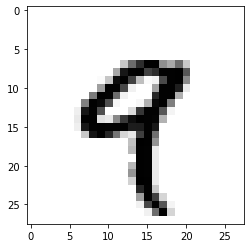

In [ ]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
my_slice = train_images[10:100]
print(my_slice[0][0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
def naive_relu(x):
  assert len(x.shape)==2 #x should be a 2D tensor

  x = x.copy() #Avoid overwriting the input tensor
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] = max(x[i,j], 0)
  return x

In [ ]:
def naive_add_matrix_and_vector(x,y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]

  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] += y[j]
  return x